1. **ID** - Unique number for each athlete
2. **Name** - Athlete's name
3. **Sex** - M or F
4. **Age** - Integer
5. **Height** - In centimeters
6. **Weight** - In kilograms
7. **Team** - Team name
8. **NOC** - National Olympic Committee 3-letter code
9. **Games** - Year and season
10. **Year** - Integer
11. **Season** - Summer or Winter
12. **City** - Host city
13. **Sport** - Sport
14. **Event** - Event
15. **Medal** - Gold, Silver, Bronze, or NA

# 1. Import Datasets

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up chart default theme and figure size
sns.set_theme(rc={'figure.dpi': 150, 'figure.figsize': (14, 9)})
%matplotlib inline

In [2]:
# Set the default title parameters
# import matplotlib as mpl
# mpl.rcParams['axes.titlepad'] = 20
# mpl.rcParams['axes.titlelocation'] = 'left'
# mpl.rcParams['axes.titleweight'] = 'bold'
# mpl.rcParams['axes.titlefontsize'] = 20

In [3]:
athletes = pd.read_csv("Dataset/athlete_events.csv")
regions = pd.read_csv("Dataset/noc_regions.csv")

### Dataset at a glance!

In [4]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
athletes.shape

(271116, 15)

In [6]:
regions.tail()

,NOC,region,notes
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN
229,ZIM,Zimbabwe,NaN


In [7]:
regions.shape

(230, 3)

### Quick descriptive stats of the datasets 

In [8]:
athletes.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


##### From this descriptive statistics we can conclude that:

- Over 120 years, there has been over 271116 people participated in Olympic Games.
- **Age:** The average age of the individuals in the dataset is approximately 25.6 years. The youngest person recorded is 10 years old, while the oldest person is 97 years old. The majority of the individuals fall within the range of 21 to 28 years, as indicated by the 25th percentile and 75th percentile values.
- **Height:** The average height of the individuals is around 175.3 cm. The shortest person recorded has a height of 127 cm, while the tallest person has a height of 226 cm. The heights of individuals vary, but the most common height range is between 168 cm and 183 cm, as suggested by the 25th percentile and 75th percentile values.
- **Weight:** The average weight of the individuals is approximately 70.7 kg. The lightest person in the dataset weighs 25 kg, while the heaviest person weighs 214 kg. The weight distribution shows variation, but the majority of individuals fall within the range of 60 kg to 79 kg, as indicated by the 25th percentile and 75th percentile values.


### Join both datasets

In [9]:
# Join dataset

df = athletes.merge(regions, how = 'left', on = 'NOC')

In [10]:
df.shape

(271116, 17)

In [11]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [12]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

# 2. Cleaning Dataset

In [13]:
# Rename Column which are not capiatalized
df.rename(columns = {'region':"Region", 'notes':"Notes"}, inplace = True)

##### *The columns which are having True (show that they have some null values in them) while those who have False (show that they don't have any null values)*

In [14]:
# Checking for missing values

null_columns = df.isnull().any()
null_columns = null_columns[null_columns]
print(null_columns)


Age       True
Height    True
Weight    True
Medal     True
Region    True
Notes     True
dtype: bool


##### *How many null values do they contain?*

In [15]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

##### We can see that Medal column have the large number of null values than others. 

##### Reason:
The reason for the large number of missing values in the "Medal" column could be attributed to the nature of the Olympics and sports competitions in general. Not all participants or athletes win medals in every event or competition. Medals are typically awarded to the top performers, such as the winners, runners-up, and sometimes third-place finishers.

Therefore, it is expected that a vast majority of participants in the dataset did not win a medal, resulting in a high number of null values in the "Medal" column. These null values indicate that the respective athletes did not receive a medal in the corresponding event.

In [16]:
# Print the list of columns in which there is at least one null values

df.columns[df.isna().any()]

Index(['Age', 'Height', 'Weight', 'Medal', 'Region', 'Notes'], dtype='object')

# 3. Analysis

### Basic Query

In [17]:
# Print tout tthe details of only Vietnamese athletes who have participated in Olympic
df.query('Team == "Vietnam"')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
34919,17997,Cao Ngc Phng Trnh,F,23.0,NaN,NaN,Vietnam,VIE,1996 Summer,1996,Summer,Atlanta,Judo,Judo Women's Extra-Lightweight,NaN,Vietnam,NaN
41420,21364,Chu Hong Diu Linh,F,18.0,174.0,66.0,Vietnam,VIE,2012 Summer,2012,Summer,London,Taekwondo,Taekwondo Women's Welterweight,NaN,Vietnam,NaN
41550,21433,Chung Th Thanh Lan,F,18.0,156.0,43.0,Vietnam,VIE,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Women's 100 metres Freestyle,NaN,Vietnam,NaN
50196,25831,ng Hiu Hin,M,21.0,162.0,48.0,Vietnam,VIE,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Light-Flyweight,NaN,Vietnam,NaN
50197,25832,ng Th To,F,24.0,167.0,51.0,Vietnam,VIE,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Women's Marathon,NaN,Vietnam,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255020,127658,V Bch Hng,F,30.0,159.0,51.0,Vietnam,VIE,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 100 metres Hurdles,NaN,Vietnam,NaN
255021,127659,V Thnh An,M,23.0,185.0,80.0,Vietnam,VIE,2016 Summer,2016,Summer,Rio de Janeiro,Fencing,"Fencing Men's Sabre, Individual",NaN,Vietnam,NaN
255022,127660,V Th Hng,F,21.0,164.0,52.0,Vietnam,VIE,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's 100 metres,NaN,Vietnam,NaN
255023,127661,V Th Trang,F,24.0,163.0,58.0,Vietnam,VIE,2016 Summer,2016,Summer,Rio de Janeiro,Badminton,Badminton Women's Singles,NaN,Vietnam,NaN


In [18]:
# print the details of Vietnam athletes who have participated in the Olympics and have won a medal (Medal is not null)
df.query('Team == "Vietnam" and Medal.notnull()')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
96703,48962,Hong Anh Tun,M,23.0,152.0,56.0,Vietnam,VIE,2008 Summer,2008,Summer,Beijing,Weightlifting,Weightlifting Men's Bantamweight,Silver,Vietnam,NaN
96709,48966,Hong Xun Vinh,M,41.0,175.0,75.0,Vietnam,VIE,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,"Shooting Men's Air Pistol, 10 metres",Gold,Vietnam,NaN
96710,48966,Hong Xun Vinh,M,41.0,175.0,75.0,Vietnam,VIE,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,"Shooting Men's Free Pistol, 50 metres",Silver,Vietnam,NaN
242905,121646,Trn Hiu Ngn,F,26.0,157.0,47.0,Vietnam,VIE,2000 Summer,2000,Summer,Sydney,Taekwondo,Taekwondo Women's Featherweight,Silver,Vietnam,NaN


In [19]:
# Comparison between Vietnam and Thailand
vietnam = df.query('Team == "Vietnam"').describe()
thailand = df.query('Team == "Thailand"').describe()

merge_df = pd.concat([vietnam,thailand], axis = 1, keys = ['Vietnam', 'Thailand'])
merge_df

Vietnam                                                   \
                  ID         Age      Height      Weight         Year   
count     154.000000  154.000000  146.000000  147.000000   154.000000   
mean    83201.233766   24.162338  165.136986   57.564626  1999.454545   
std     28592.041915    6.688661    7.985012    8.898259    13.902128   
min     17997.000000   15.000000  147.000000   43.000000  1980.000000   
25%     68751.250000   20.000000  160.000000   51.000000  1988.000000   
50%     85728.000000   23.000000  165.000000   56.000000  2004.000000   
75%     94388.500000   26.000000  170.000000   63.000000  2012.000000   
max    127730.000000   48.000000  192.000000   90.000000  2016.000000   

            Thailand                                                   
                  ID         Age      Height      Weight         Year  
count     732.000000  698.000000  660.000000  661.000000   732.000000  
mean    80723.967213   24.893983  168.328788   61.857035  1987.688525  
std     37693.453049    6.663478    7.499282   10.126304    19.230084  
min      1494.000000   13.000000  142.000000   44.000000  1952.000000  
25%     54814.000000   20.000000  164.000000   55.000000  1968.000000  
50%     92064.500000   24.000000  168.000000   60.000000  1992.000000  
75%    114045.000000   27.000000  173.000000   67.000000  2004.000000  
max    133436.000000   58.000000  193.000000  148.000000  2016.000000

##### Based on the comparison of descriptive statistics between Vietnamese and Thai athletes who participated in the Olympics from 1896 to 2016, we can draw several conclusions:

- **Number of Athletes:** There were significantly more Thai athletes (732) than Vietnamese athletes (154) who participated in the Olympics during this period. This suggests that Thailand has had a larger presence in the Olympics compared to Vietnam.

- **Age:** The average age of Vietnamese athletes (24.16 years) was slightly lower than that of Thai athletes (24.89 years). This suggests that both countries had a similar age distribution among their Olympic participants.

- **Height:** On average, Thai athletes (168.33 cm) were taller than Vietnamese athletes (165.14 cm).

- **Weight:** On average, Thai athletes (61.86 kg) were heavier than Vietnamese athletes (57.56 kg).

- **Year of Participation:** The earliest year in which Vietnamese athletes participated in the Olympics was 1980, while for Thai athletes it was 1952. Both countries had athletes participating in the Olympics as recently as 2016 in the dataset.

Overall, from the dataset, these statistics suggest that Thailand has had a larger and more established presence in the Olympics compared to Vietnam, with more athletes participating and a longer history of participation. On average, Thai athletes were taller and heavier than Vietnamese athletes. 

### Charting

##### Top 10 countries with participation rate

In [20]:
# Top 10 countries with participation rate
top_10_countries = df['Team'].value_counts().sort_values(ascending = False).head(10)
top_10_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

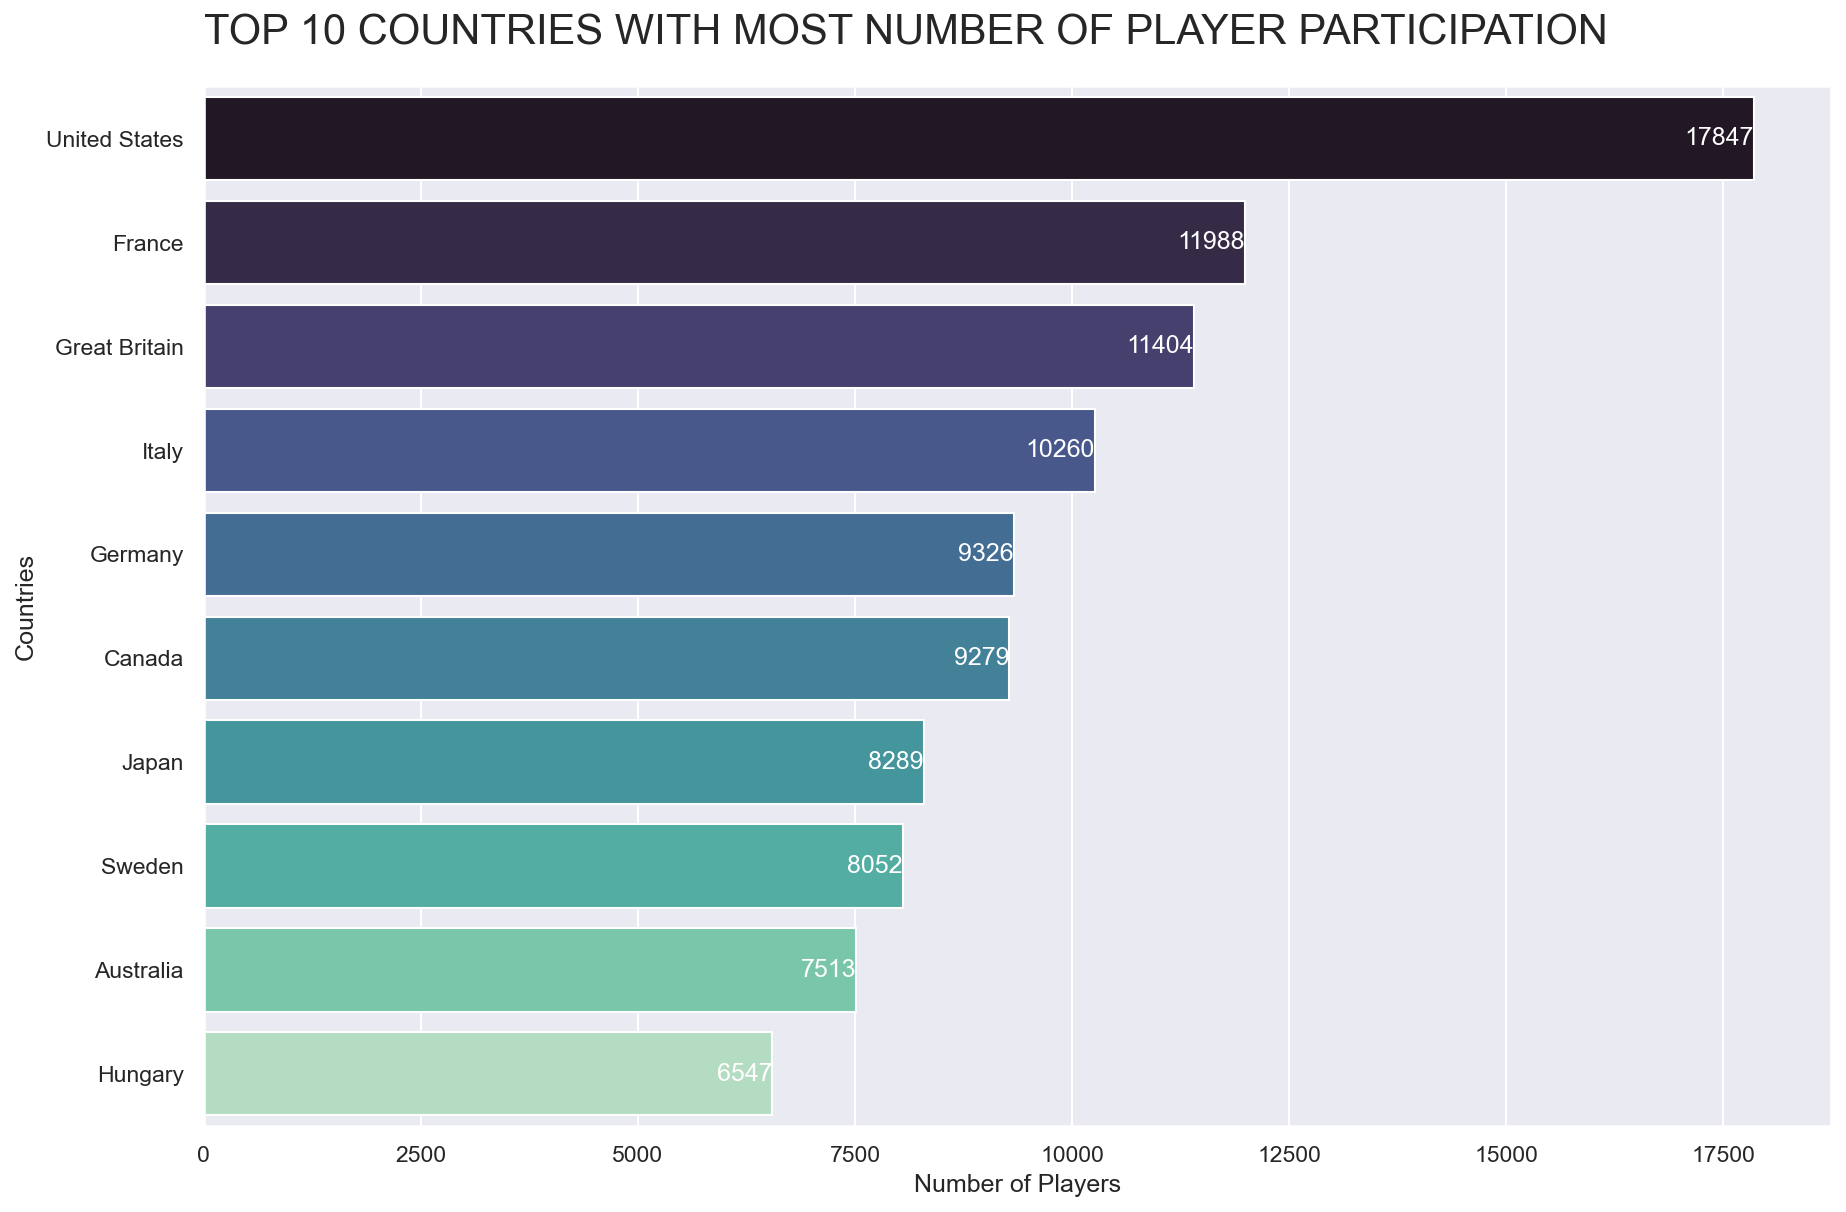

In [21]:
# Barplot to show top 10 countries most participating
sns.barplot(data = df, y = top_10_countries.index, x = top_10_countries.values, palette = "mako")
plt.xlabel("Number of Players")
plt.ylabel("Countries")
plt.title("TOP 10 COUNTRIES WITH MOST NUMBER OF PLAYER PARTICIPATION", loc='left', size=20, pad=20)

for i, v in enumerate(top_10_countries.values):
    plt.text(v, i, str(v), ha='right', va='center', color = 'white')  # Swap x and y coordinates, adjust alignment

##### Age Distribution of Players

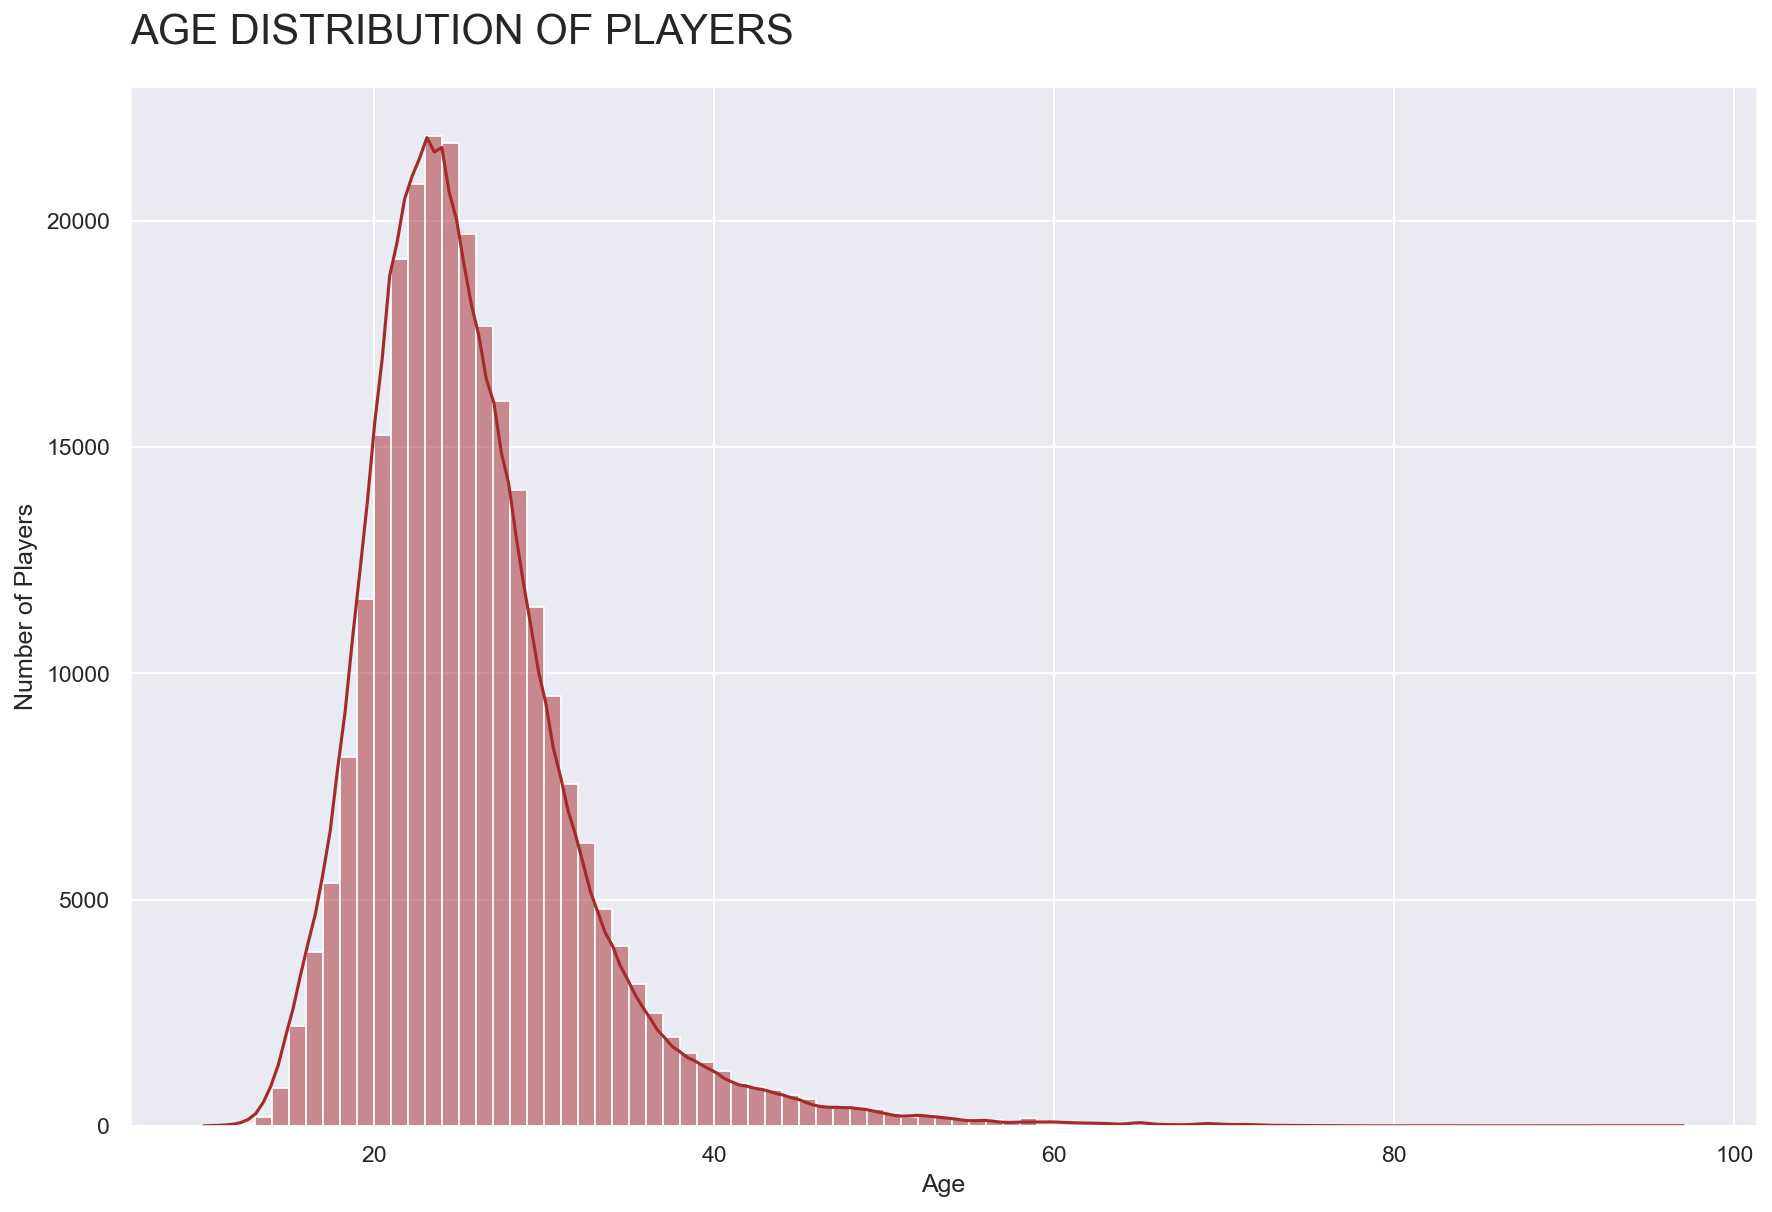

In [22]:
# Show the age distribution of players using histogram and boxplot
sns.histplot(data = df['Age'], bins = np.arange(10,60), kde = True, color = 'brown')
plt.ylabel("Number of Players")
plt.xlabel("Age")
plt.title("AGE DISTRIBUTION OF PLAYERS", loc='left', size=20, pad=20);

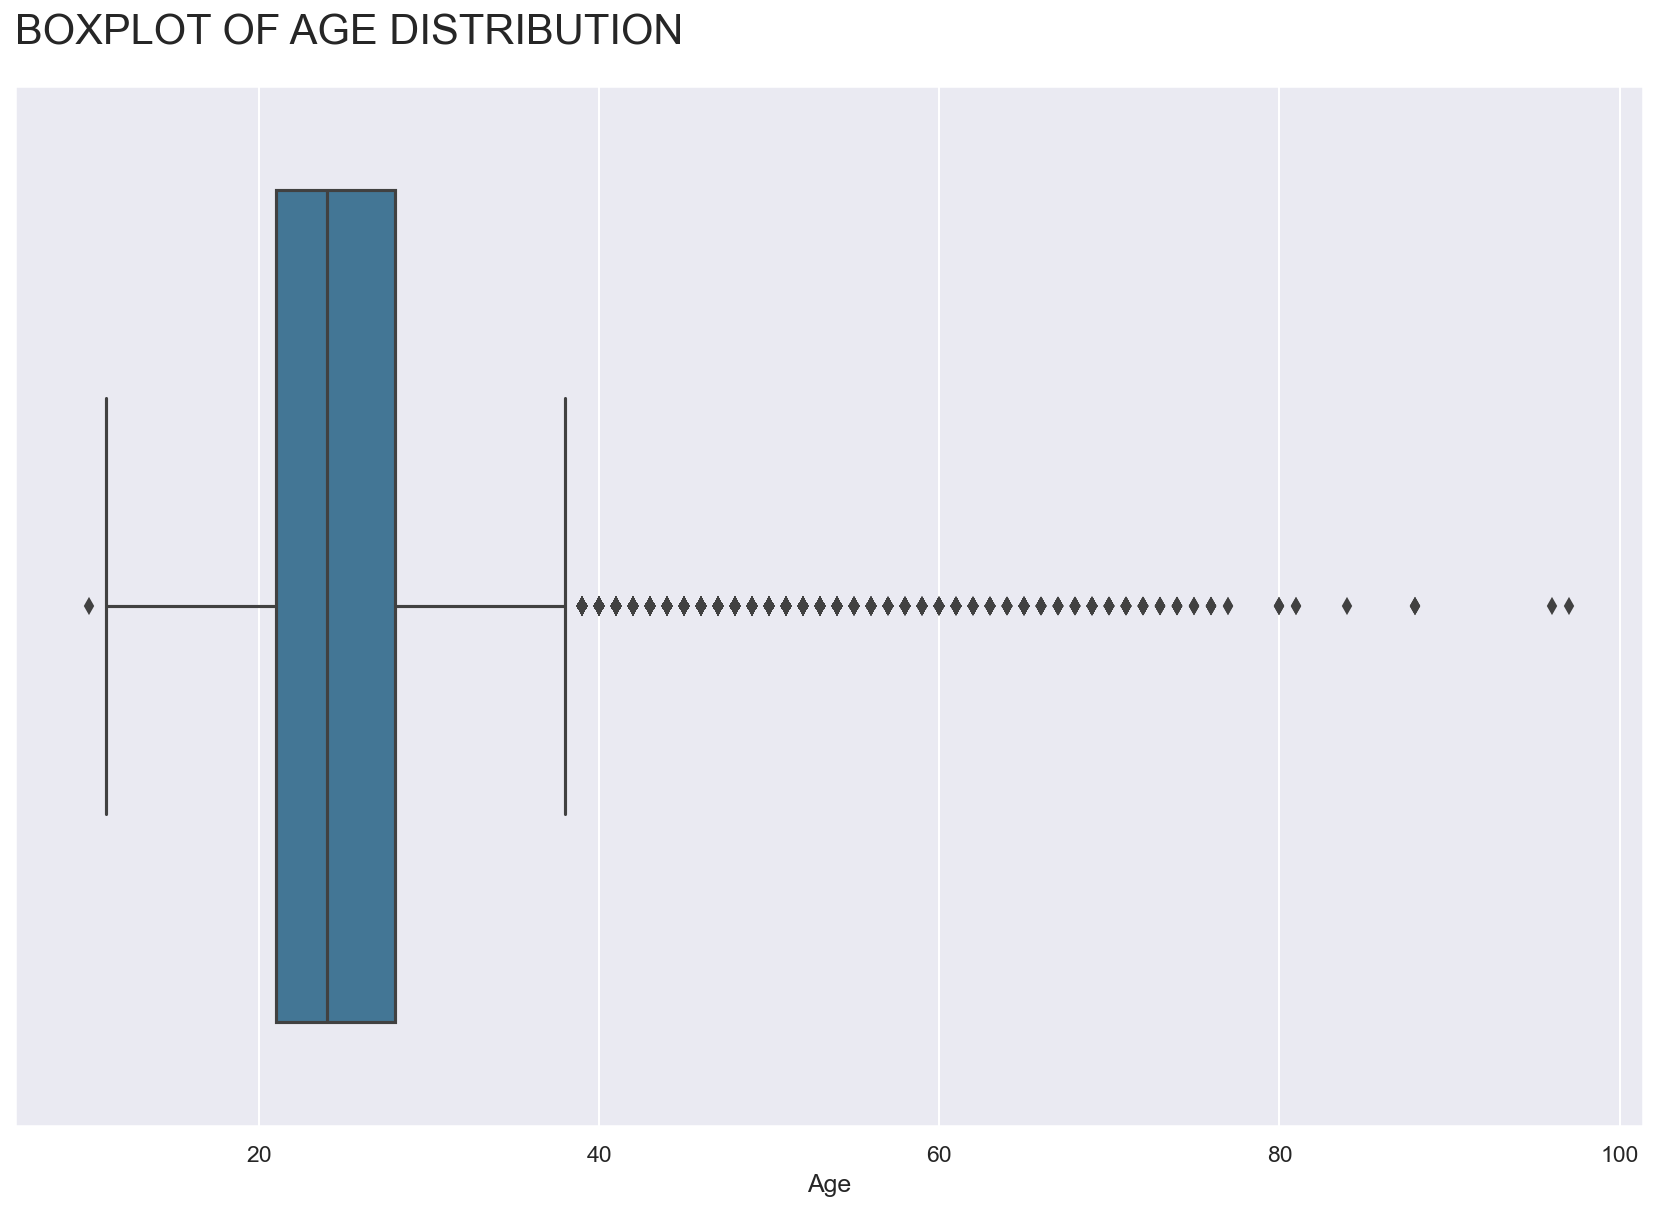

In [23]:
sns.boxplot(x = df['Age'], palette = 'mako_r')
plt.title("BOXPLOT OF AGE DISTRIBUTION", loc='left', size=20, pad=20);

##### Number of Participants in Winter Games vs Summer Games

In [24]:
# Filter the DataFrame for Winter Games
winter_games = df[df['Season'] == 'Winter']

# Group the data by Year and count the number of participants
winter_participants = winter_games.groupby('Year').size().reset_index(name='Winter Games Participants')

# Filter the DataFrame for Summer Games
summer_games = df[df['Season'] == 'Summer']

# Group the data by Year and count the number of participants
summer_participants = summer_games.groupby('Year').size().reset_index(name='Summer Games Participants')

# Merge the Winter and Summer participants data
combined_data = winter_participants.merge(summer_participants, on='Year', how='outer')
combined_data

,Year,Winter Games Participants,Summer Games Participants
0,1924,460.0,5233.0
1,1928,582.0,4992.0
2,1932,352.0,2969.0
3,1936,895.0,6506.0
4,1948,1075.0,6405.0
5,1952,1088.0,8270.0
6,1956,1307.0,5127.0
7,1960,1116.0,8119.0
8,1964,1778.0,7702.0
9,1968,1891.0,8588.0


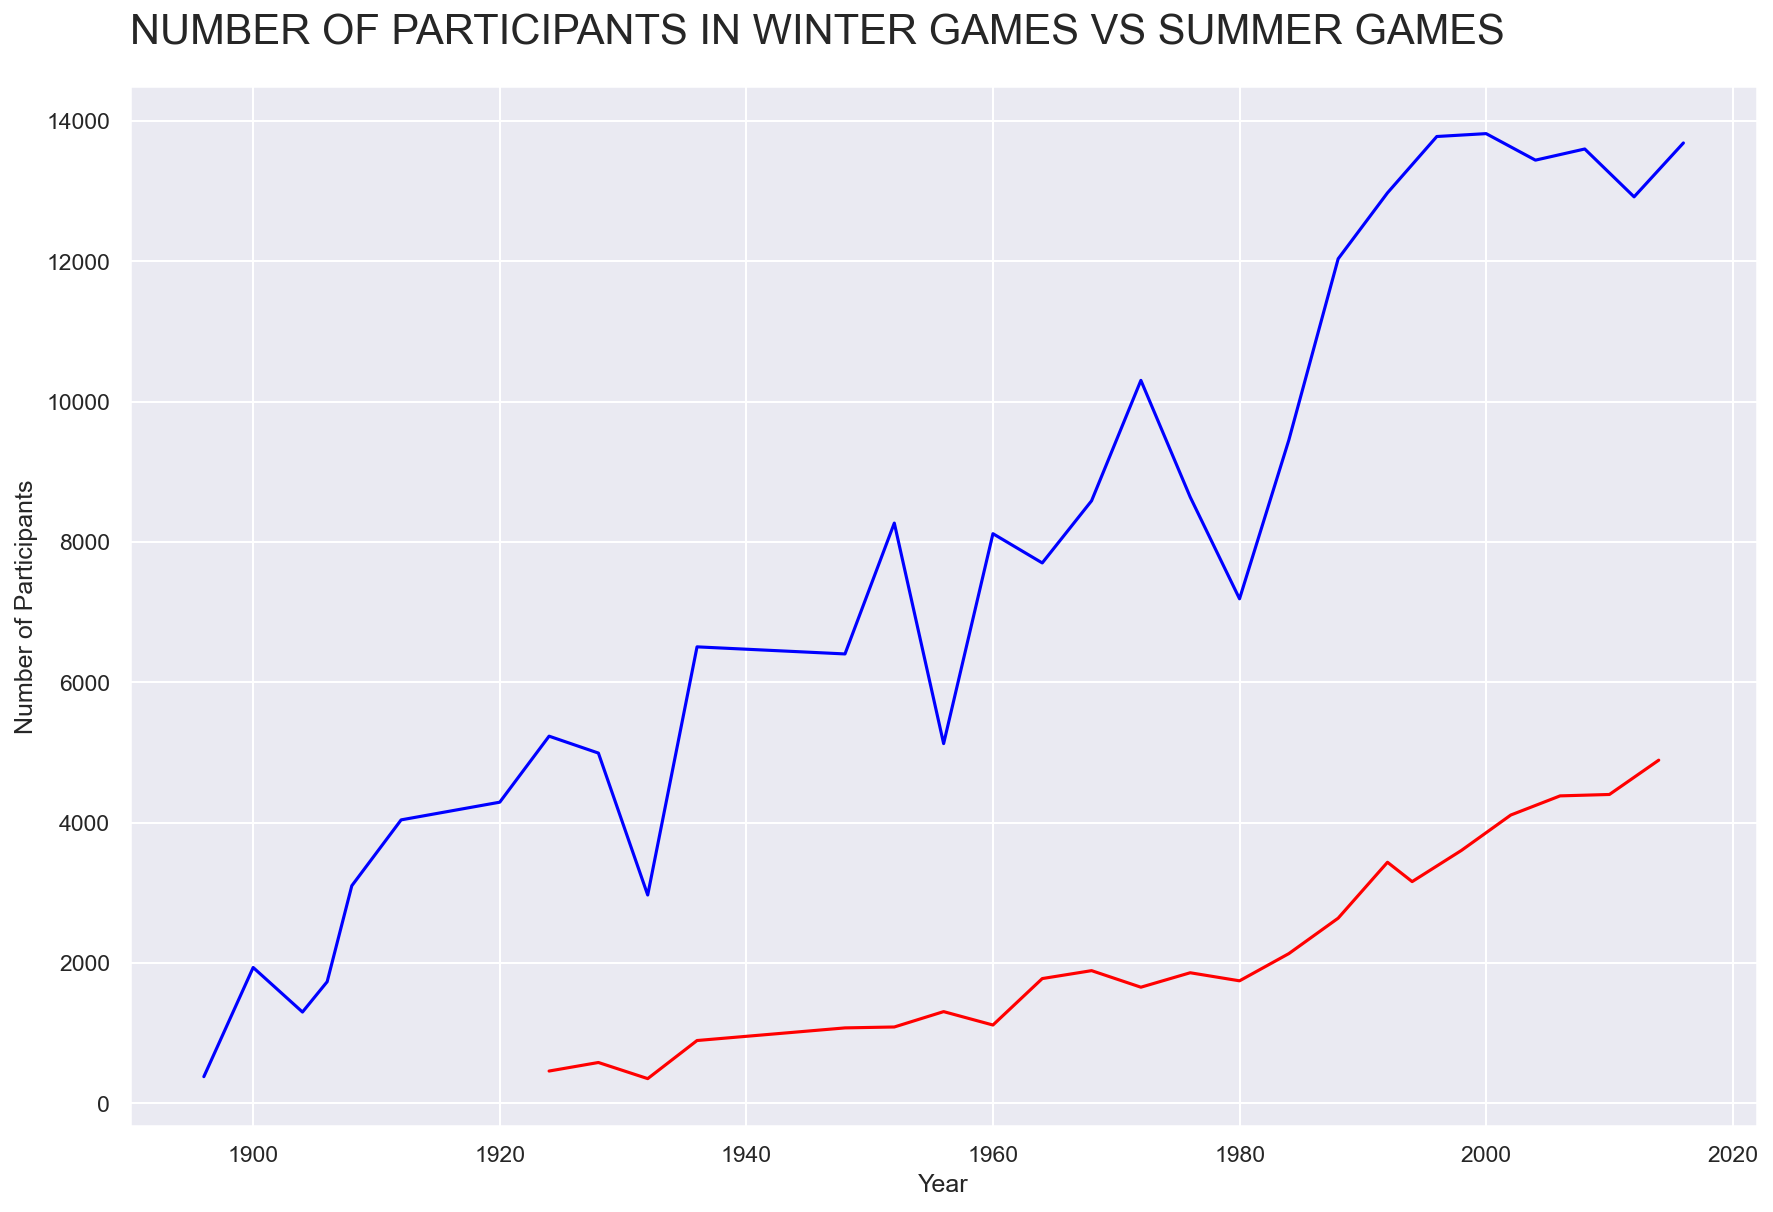

In [25]:
# Plot the line chart for Winter Games
sns.lineplot(data=combined_data, x='Year', y='Winter Games Participants', color='red')

# Plot the line chart for Summer Games
sns.lineplot(data=combined_data, x='Year', y='Summer Games Participants', color='blue')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Number of Participants')
plt.title('NUMBER OF PARTICIPANTS IN WINTER GAMES VS SUMMER GAMES', loc='left', size=20, pad=20);

##### The number of Sports played in both Winter & Summer Olympics

In [26]:
# Sports in Winter Olympic only
winter_games = df[df['Season'] == 'Winter']['Sport'].unique()
winter_games

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [27]:
# Sports in Summer Olympic only
summer_games = df[df['Season'] == 'Summer']['Sport'].unique()
summer_games

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [28]:
print(f"The number of Sports played in Winter Olympics is {len(winter_games)}.")
print(f"The number of Sports played in Summer Olympics is {len(summer_games)}.")
counts = len(df['Sport'].value_counts())
print(f"The number of Sports played in both Winter & Summer Olympics is {counts}.")


The number of Sports played in Winter Olympics is 17.
The number of Sports played in Summer Olympics is 52.
The number of Sports played in both Winter & Summer Olympics is 66.


We can see that there 3 games which are played in both Winter Olympics and Summer Olympics, they are:

In [29]:
games_both_seasons = set(winter_games) & set(summer_games)
games_both_seasons

{'Alpinism', 'Figure Skating', 'Ice Hockey'}

##### Number of Male vs Female Participants in the Olympics

In [30]:
# Ratio of Male v/s Female participant in the Olympics history

gender_counts = df['Sex'].value_counts()
gender_counts.apply(lambda x: x/gender_counts.sum()*100).round(2)

M    72.51
F    27.49
Name: Sex, dtype: float64

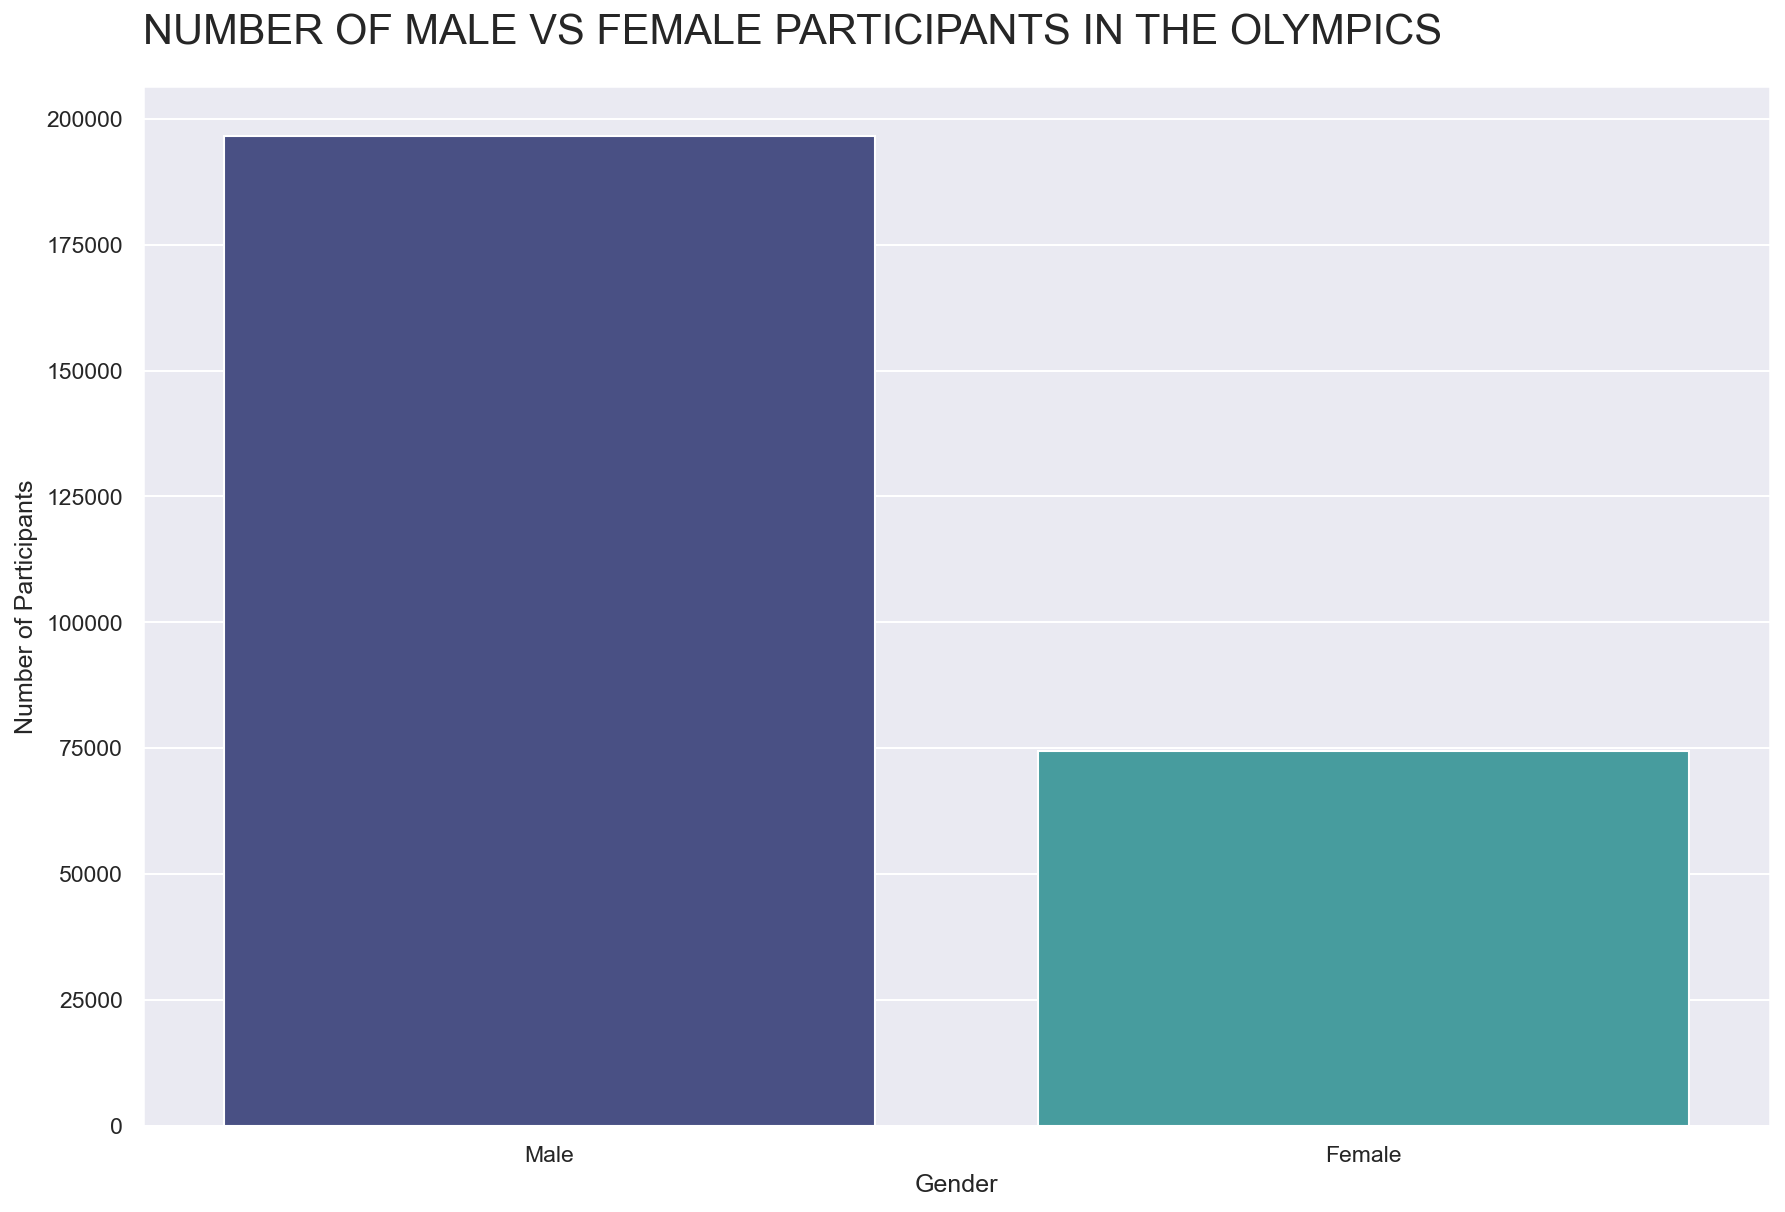

In [31]:
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='mako')

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Number of Participants')
plt.title('NUMBER OF MALE VS FEMALE PARTICIPANTS IN THE OLYMPICS', loc = 'left', size = 20, pad = 20)

# Add category labels
plt.xticks([0, 1], ['Male', 'Female']);

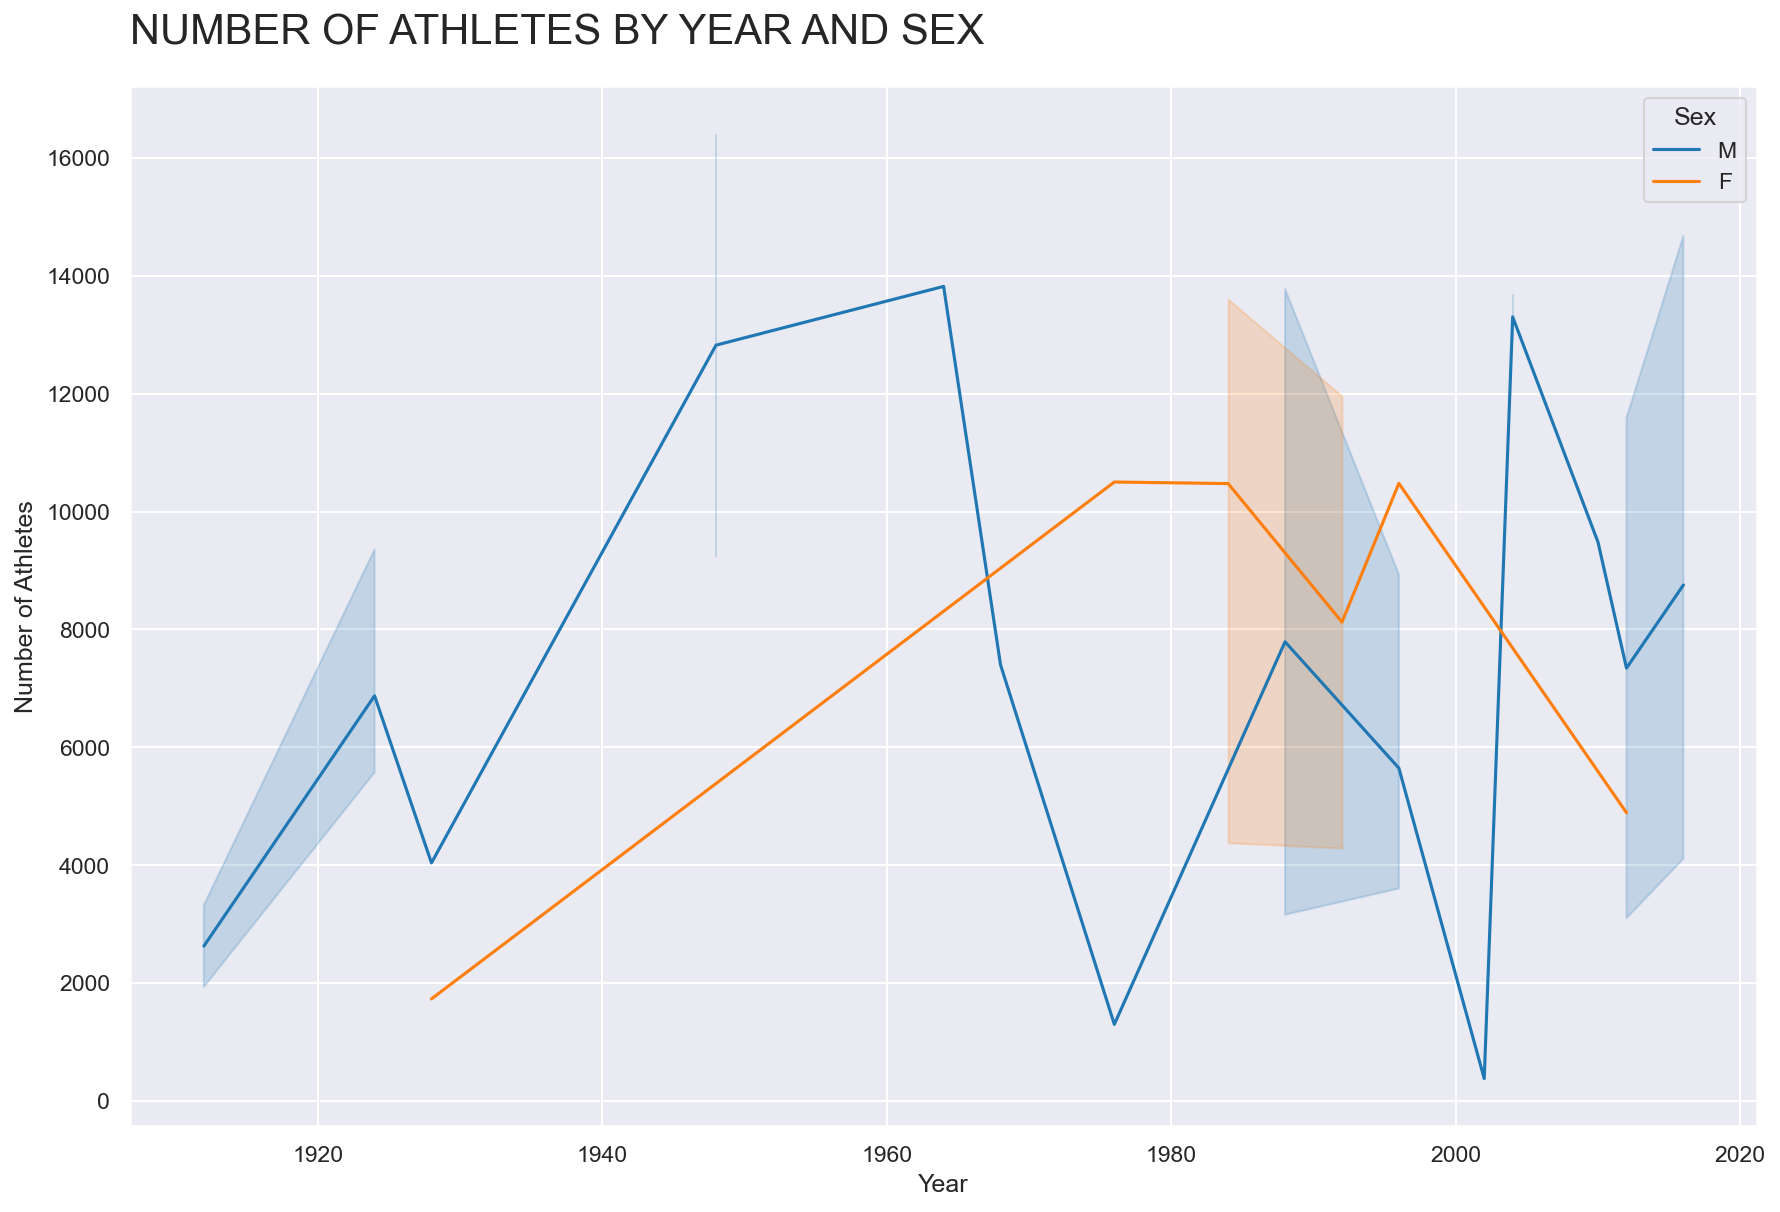

In [32]:
sns.lineplot(data=df, x='Year', y=df.groupby('Year').size(), hue='Sex', palette= 'tab10')
plt.title('NUMBER OF ATHLETES BY YEAR AND SEX', loc = 'left', size = 20, pad = 20)
plt.xlabel('Year')
plt.ylabel('Number of Athletes');

##### Ratio of Male to Female Participants Over the Years

In [33]:
# Group the data by year and sex, and count the number of participants
gender_counts = df.groupby(['Year', 'Sex']).size().unstack()

# Calculate the ratio of male to female participants
gender_ratio = gender_counts['M'] / gender_counts['F']

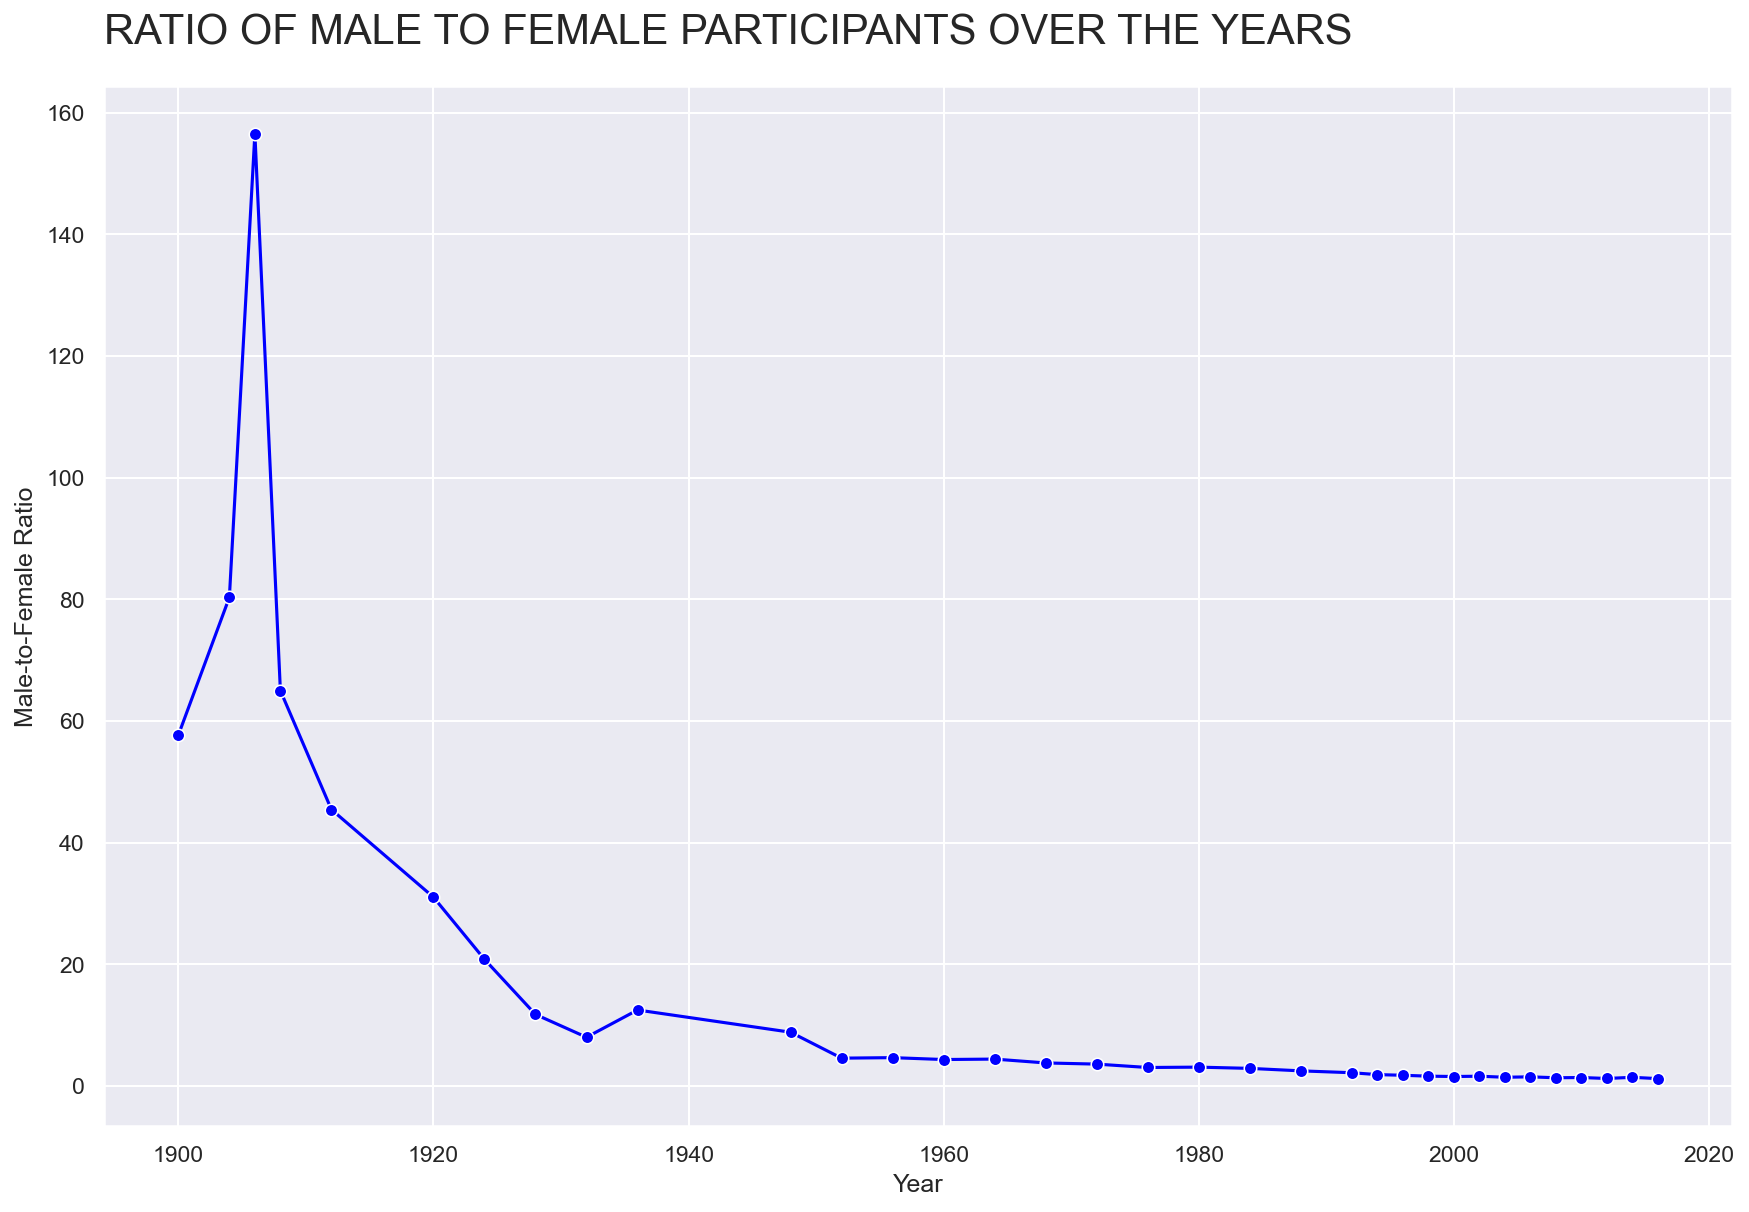

In [34]:
sns.lineplot(x=gender_ratio.index, y=gender_ratio.values, marker='o', color='blue')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Male-to-Female Ratio')
plt.title('RATIO OF MALE TO FEMALE PARTICIPANTS OVER THE YEARS', loc = 'left', size = 20, pad = 20);

##### Conclusion from the chart

The chart depicts the ratio of male to female participants in the Olympics over the years. 

In the early 1900s, there was a significant gender imbalance, with the ratio of male participants to female participants being approximately 160%. This indicates that the Olympics were predominantly male-centric during that period.

However, as time progressed, there was a gradual decrease in the gender ratio. By the 1930s, the ratio dropped to below 10% and and stayted around 15% to 1940, indicating a slight increase in female participation.

From the 1940s onwards, the gender ratio continued to decline steadily. Eventually, it reached nearly 0%, indicating a more balanced representation of male and female participants in recent Olympic events.

This trend highlights the progress made towards gender equality in Olympic participation, with greater opportunities and representation for female athletes over the years.


##### Medal Counts By Top 10 Country by Total Medals

In [35]:
df['Medal'].value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [36]:
# Group the data by "Team" and count the occurrences of each medal type
country_with_medals = df.groupby(['Team','Medal']).size().unstack()
country_with_medals

Medal,Bronze,Gold,Silver
Team,,,
A North American Team,4.0,NaN,NaN
Afghanistan,2.0,NaN,NaN
Algeria,8.0,5.0,4.0
Ali-Baba II,5.0,NaN,NaN
Amateur Athletic Association,NaN,5.0,NaN
...,...,...,...
Winnipeg Shamrocks-1,NaN,12.0,NaN
Yugoslavia,93.0,130.0,167.0
Zambia,1.0,NaN,1.0


In [37]:
#Calculate the total counts of medals for each country and add a new column
country_with_medals['Total'] = country_with_medals.sum(axis=1)
country_with_medals['Total']

Team
A North American Team             4.0
Afghanistan                       2.0
Algeria                          17.0
Ali-Baba II                       5.0
Amateur Athletic Association      5.0
                                ...  
Winnipeg Shamrocks-1             12.0
Yugoslavia                      390.0
Zambia                            2.0
Zimbabwe                         22.0
Zut                               3.0
Name: Total, Length: 498, dtype: float64

In [38]:
# Sort the values based on the total count of medals in descending order
country_with_medals = country_with_medals.sort_values('Total', ascending=False).reset_index(inplace=False)

# Select the top 10 countries
top_10_by_medal = country_with_medals.head(11)
top_10_by_medal

Medal,Team,Bronze,Gold,Silver,Total
0,United States,1233.0,2474.0,1512.0,5219.0
1,Soviet Union,677.0,1058.0,716.0,2451.0
2,Germany,678.0,679.0,627.0,1984.0
3,Great Britain,572.0,519.0,582.0,1673.0
4,France,577.0,455.0,518.0,1550.0
5,Italy,484.0,535.0,508.0,1527.0
6,Sweden,507.0,451.0,476.0,1434.0
7,Australia,511.0,342.0,453.0,1306.0
8,Canada,408.0,422.0,413.0,1243.0
9,Hungary,365.0,432.0,330.0,1127.0


##### Change to melted_df for charting

In [39]:
# Reshape the dataframe using melt
melted_df = pd.melt(top_10_by_medal, id_vars=['Team'], value_vars=['Bronze', 'Silver', 'Gold'], var_name='Medal', value_name='Count')

# Sort the dataframe by the team and medal
melted_df = melted_df.sort_values(['Team', 'Medal'])

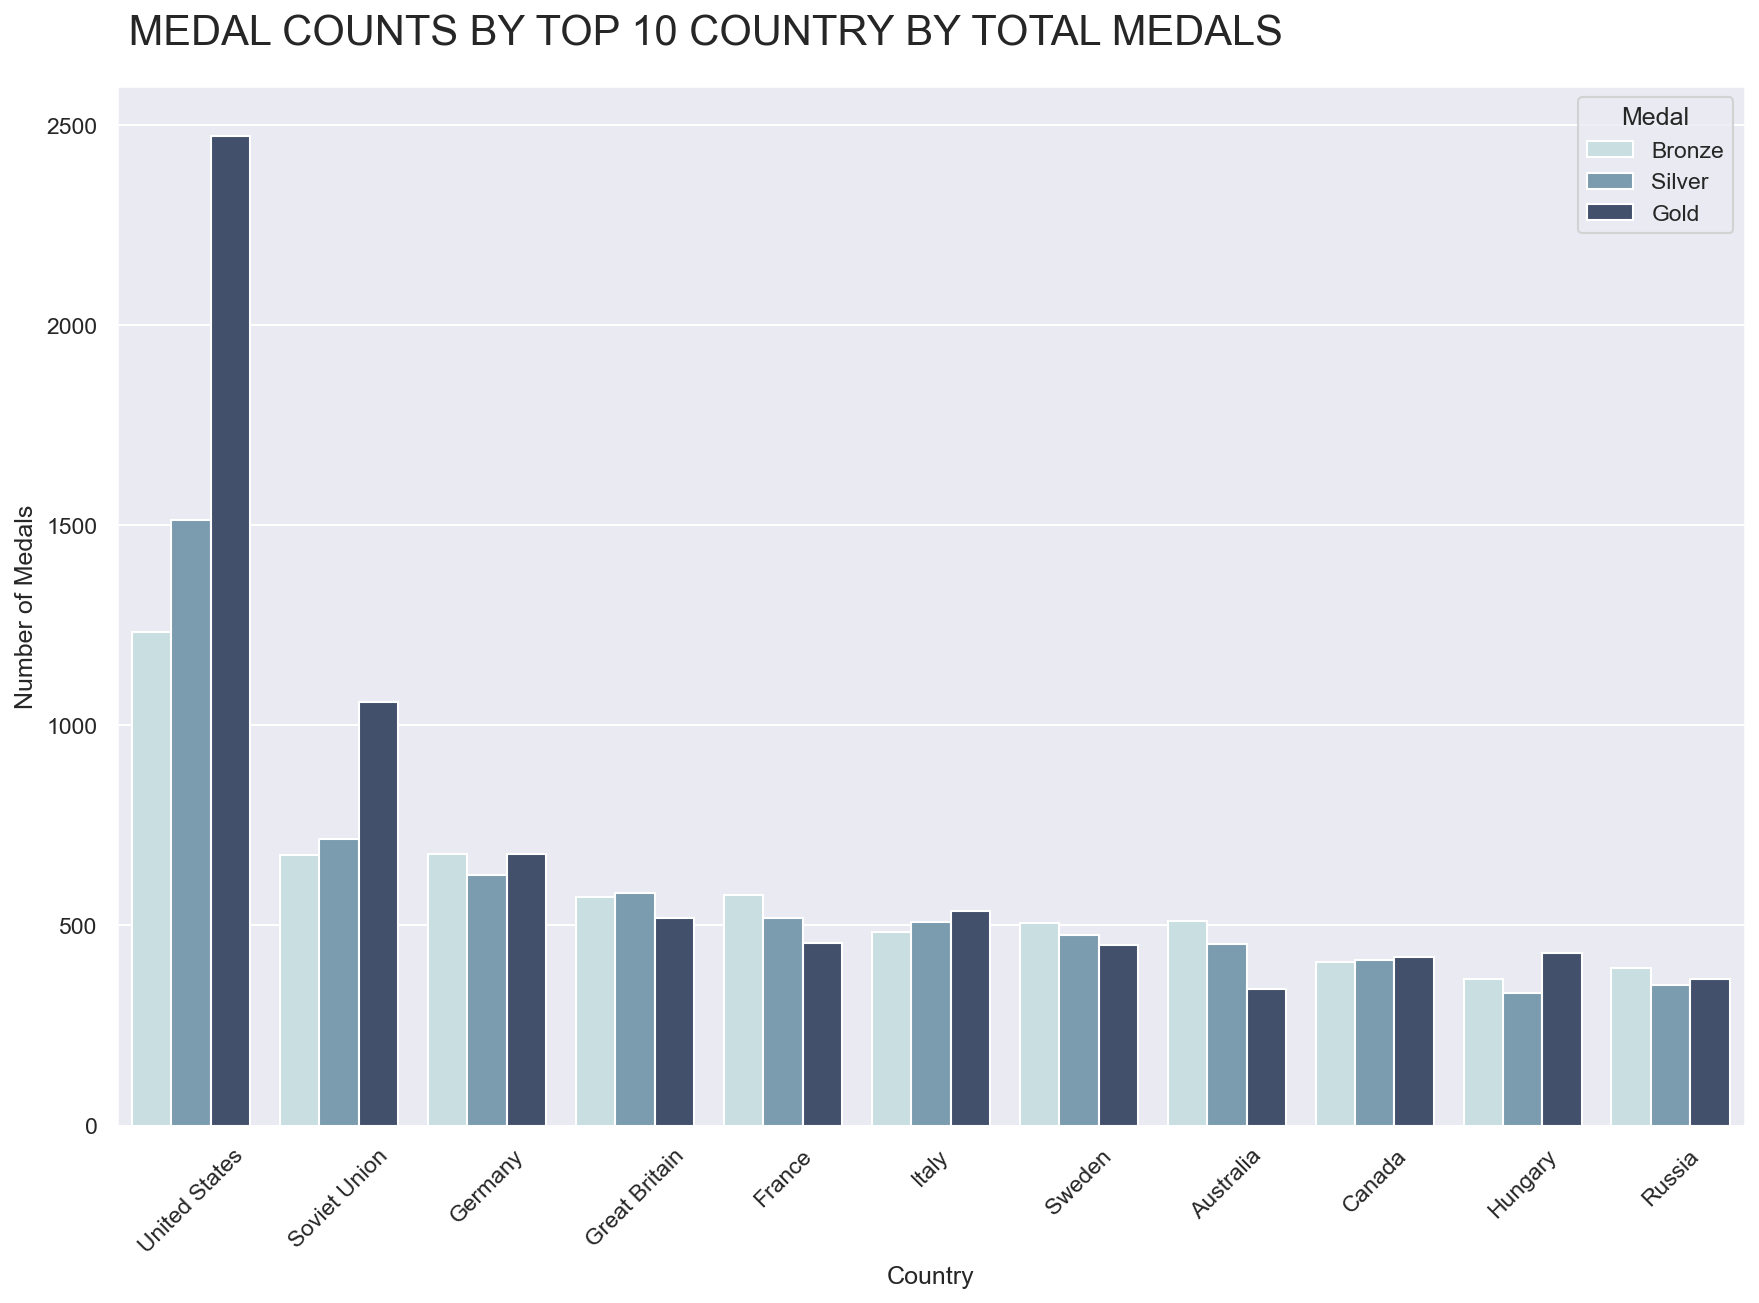

In [40]:
custom_palette = {'Bronze': 'peru', 'Silver': 'silver', 'Gold': 'gold'}

# Create the bar plot
ax = sns.barplot(x='Team', y='Count', data=melted_df, 
            hue='Medal', 
            palette='ch:r=-.2,d=.3', 
            hue_order=['Bronze', 'Silver', 'Gold'], 
            order = top_10_by_medal['Team'])

# Set the chart title and labels
plt.title(' MEDAL COUNTS BY TOP 10 COUNTRY BY TOTAL MEDALS', loc = 'left', size = 20, pad = 20)
plt.xlabel('Country')
plt.ylabel('Number of Medals')

# Rotate the x-axis labels for better readability 
plt.xticks(rotation=45)

# Display the legend
plt.legend(title='Medal');

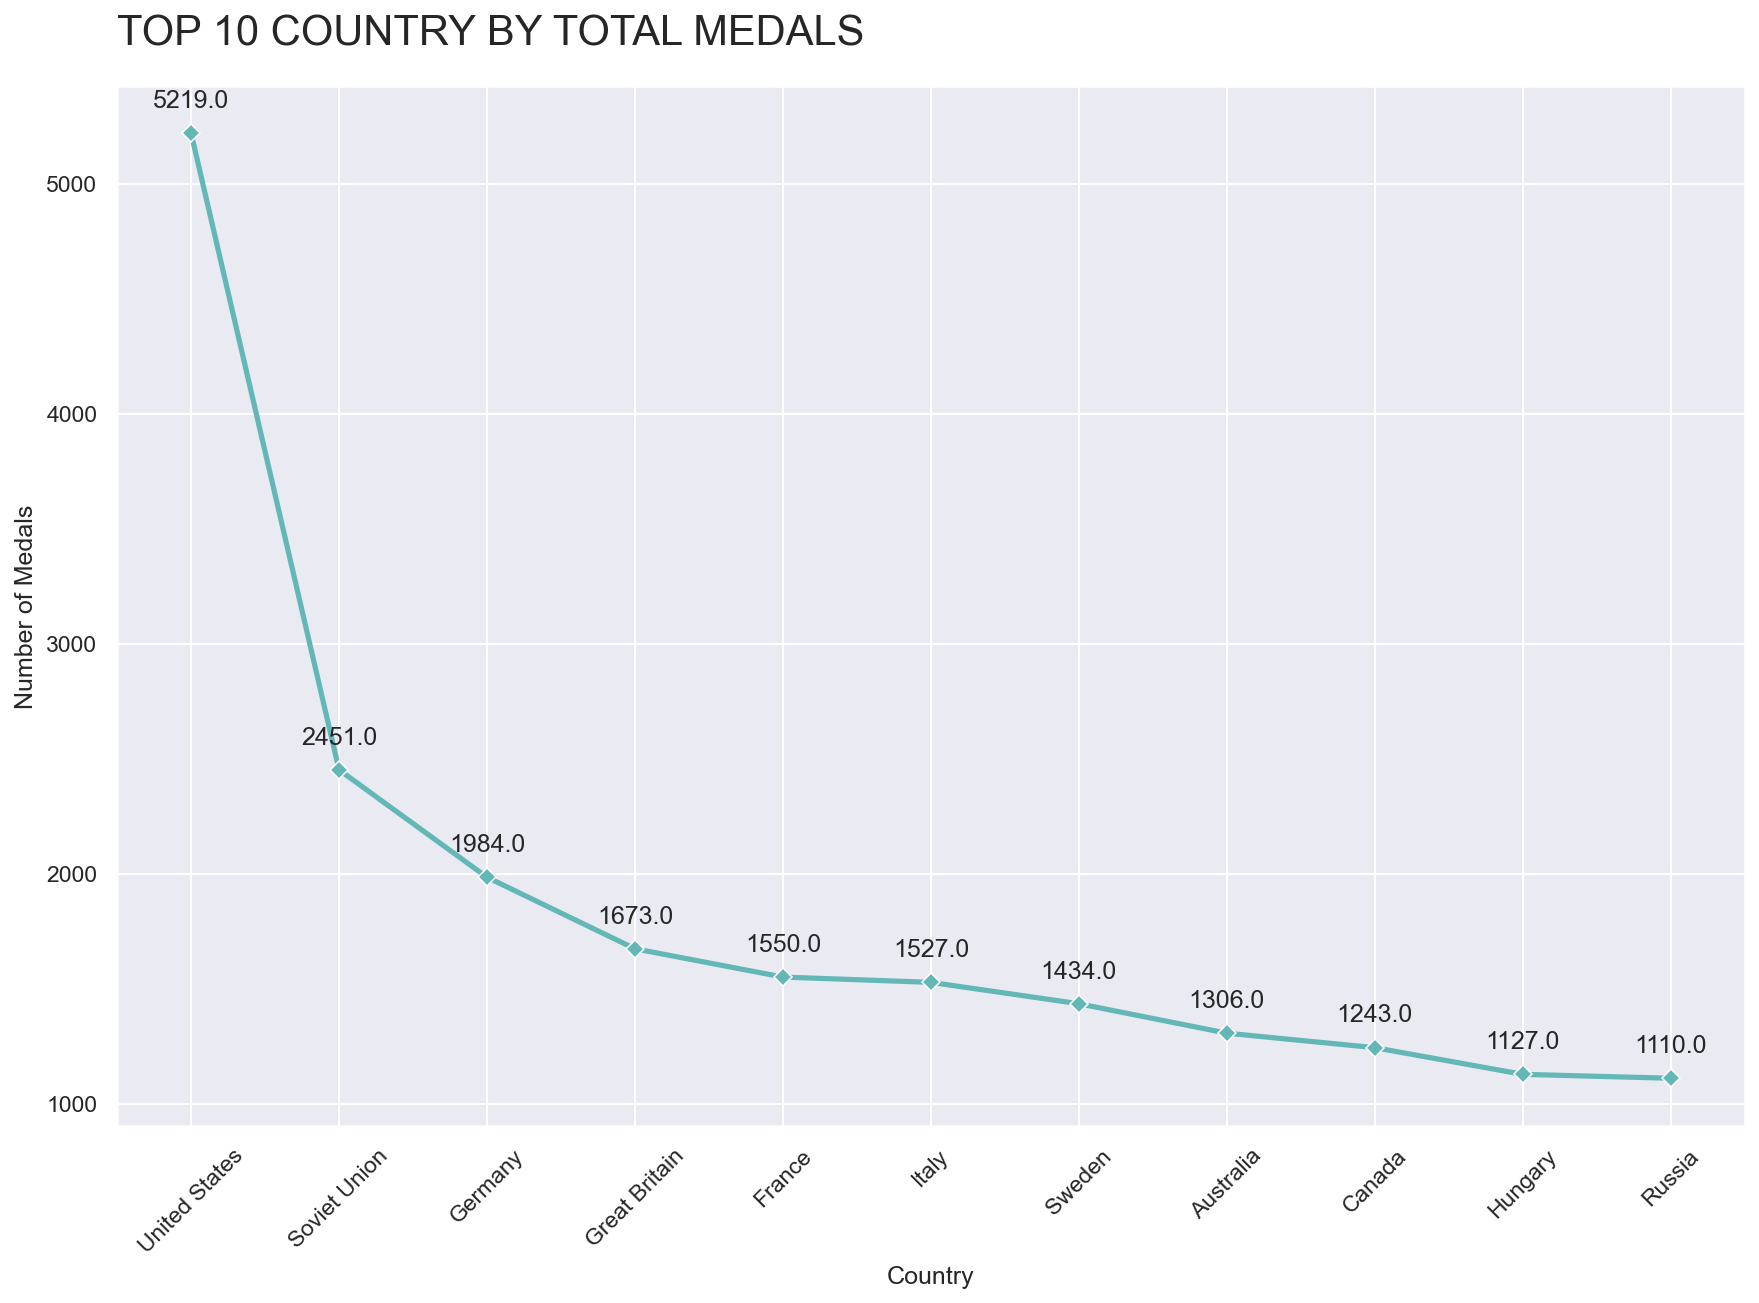

In [41]:
# Plot a line chart for total medals
sns.lineplot(data=top_10_by_medal, x='Team', y='Total', marker='D', color='#63B7B7', linewidth = 2.5)

# Add text labels for total medals on the line chart
for x, y in zip(top_10_by_medal['Team'], top_10_by_medal['Total']):
    plt.annotate(text=str(y), xy=(x, y), xytext=(0, 10), textcoords='offset points', ha='center', va='bottom', fontsize=12)

# Set the chart title and labels
plt.title('TOP 10 COUNTRY BY TOTAL MEDALS', loc='left', size=20, pad=20)
plt.xlabel('Country')
plt.ylabel('Number of Medals')

# Rotate the x-axis labels for better readability 
plt.xticks(rotation=45);

##### From the chart, we can observe the following key points:

- The United States stands out as the leading country with the highest number of total medals, including gold, silver, and bronze. The number of gold medals is particularly remarkable, reaching nearly 2500. 
- The Soviet Union secures the second position, but its total medal count is roughly half that of the United States.
- Among the top 10 countries, Germany and Great Britain hold the third and fourth positions, respectively, with all three types of medals exceeding 500.
- France, Italy, and Sweden demonstrate similar total medal counts, hovering around 1500. However, their distribution across gold, silver, and bronze medals differs. France and Sweden excel in bronze medals, while Italy shines in gold medals.
- Canada, Hungary, and Russia occupy the bottom three spots in the top 10. These countries have relatively lower total medal counts, with each type of medal falling below 500.

Overall, the chart highlights the dominance of the United States and the varying medal distributions among the top-performing countries.

In [42]:
# Find out the details of those players who won gold medal and older than 50 years olds.
gold_medalist_above_50 = df[(df['Age'] > 60) & (df['Medal'] == 'Gold')][['Name', 'Age','Team','Sport','Medal','Year']]
gold_medalist_above_50

,Name,Age,Team,Sport,Medal,Year
104003,Isaac Lazarus Israls,63.0,Netherlands,Art Competitions,Gold,1928
105199,Charles Jacobus,64.0,United States,Roque,Gold,1904
190952,"Lida Peyton ""Eliza"" Pollock (McMillen-)",63.0,Cincinnati Archers,Archery,Gold,1904
226374,"Galen Carter ""G. C."" Spencer",63.0,Potomac Archers,Archery,Gold,1904
233390,Oscar Gomer Swahn,64.0,Sweden,Shooting,Gold,1912
261102,"Robert W. Williams, Jr.",63.0,Potomac Archers,Archery,Gold,1904


##### Height vs Weight of Olympic Medalists

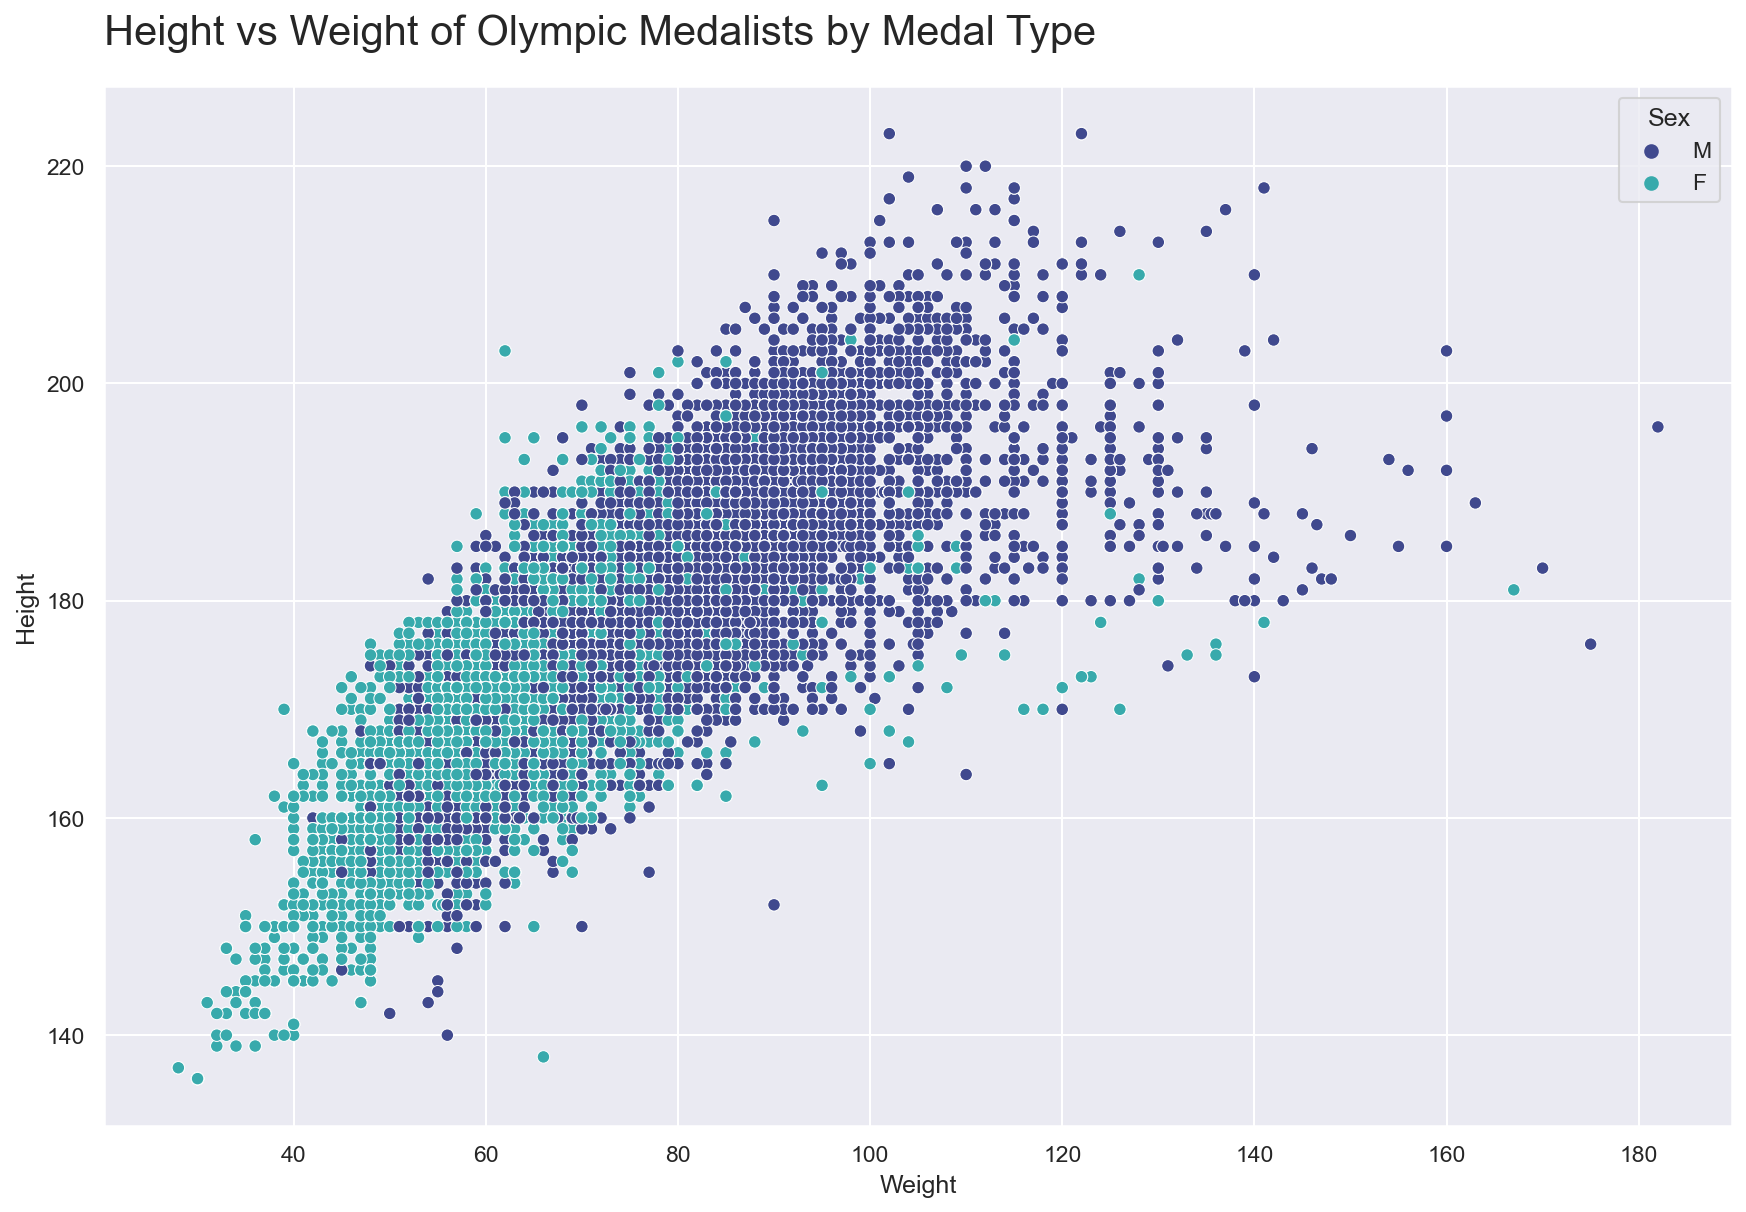

In [43]:
ax = sns.scatterplot(x="Weight", y="Height", data=df[~df['Medal'].isnull()], hue='Sex', palette = 'mako')
plt.title('Height vs Weight of Olympic Medalists by Medal Type', loc='left', size=20, pad=20);

##### Average Height of Olympic Medalists by Sex and Year

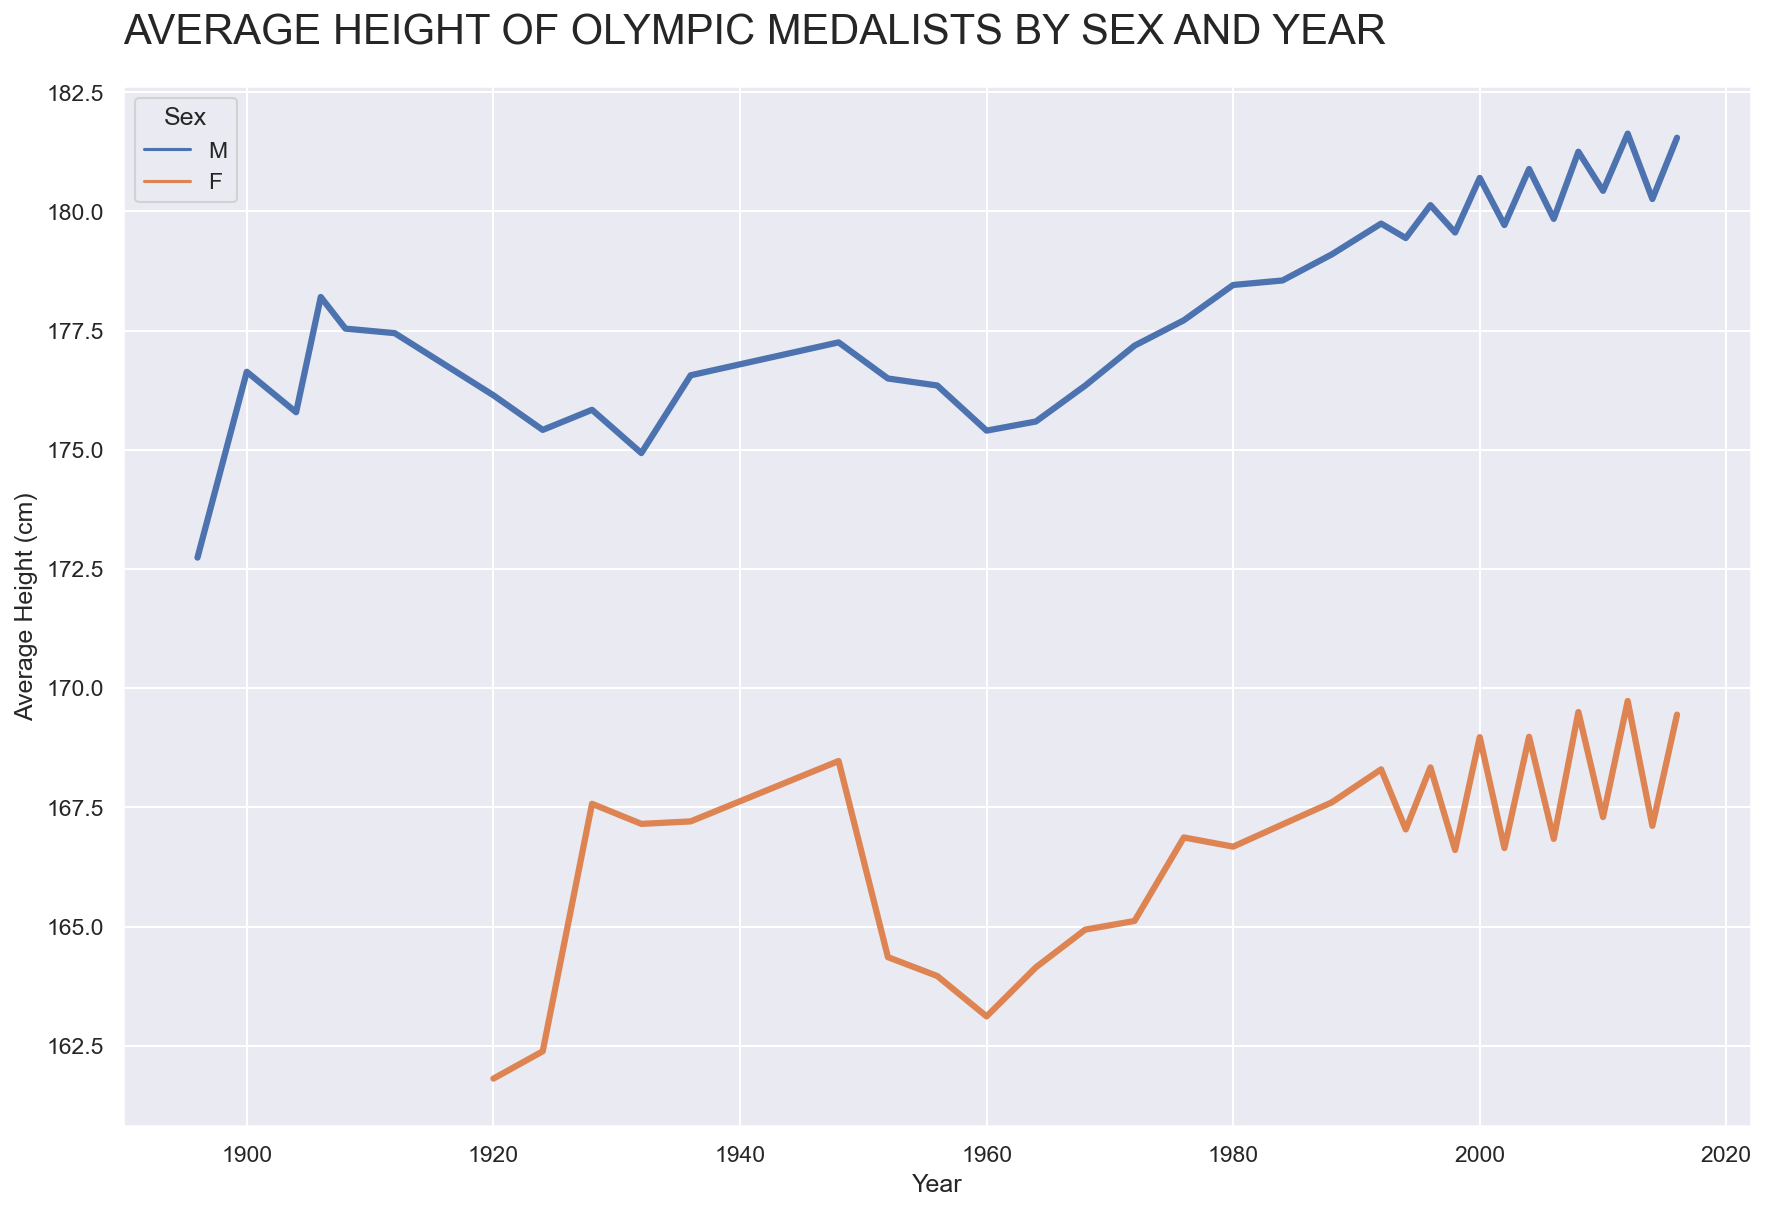

In [44]:
sns.lineplot(x='Year', y='Height', hue='Sex', estimator='mean', errorbar=None, data=df, linewidth = 3)
plt.title('AVERAGE HEIGHT OF OLYMPIC MEDALISTS BY SEX AND YEAR',  loc='left', size=20, pad=20)
plt.xlabel('Year')
plt.ylabel('Average Height (cm)');

<Figure size 2250x2250 with 0 Axes>

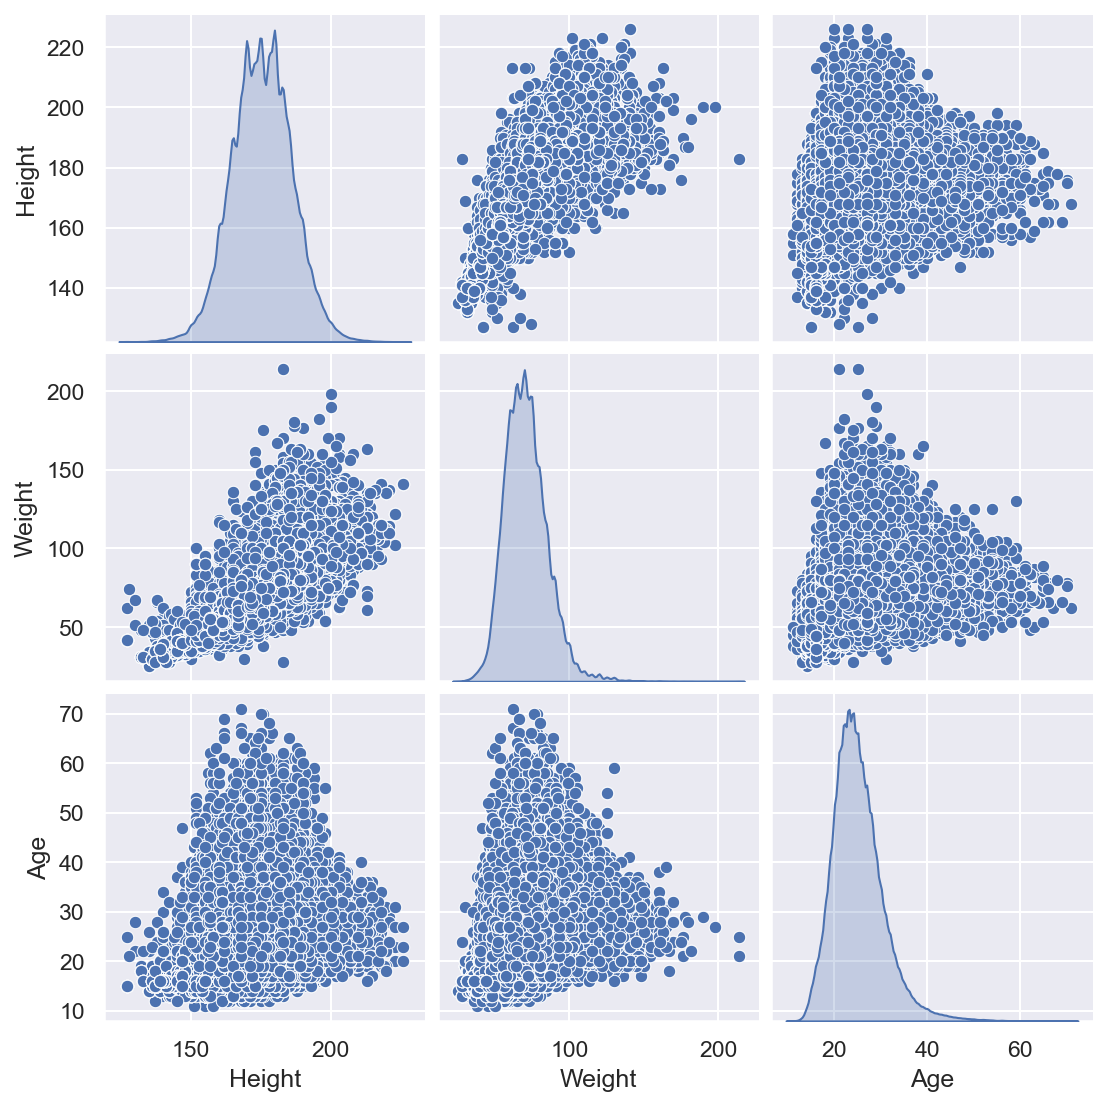

In [45]:
plt.figure(figsize = (15,15))
sns.pairplot(df[['Height', 'Weight', 'Age']].dropna(), diag_kind="kde")

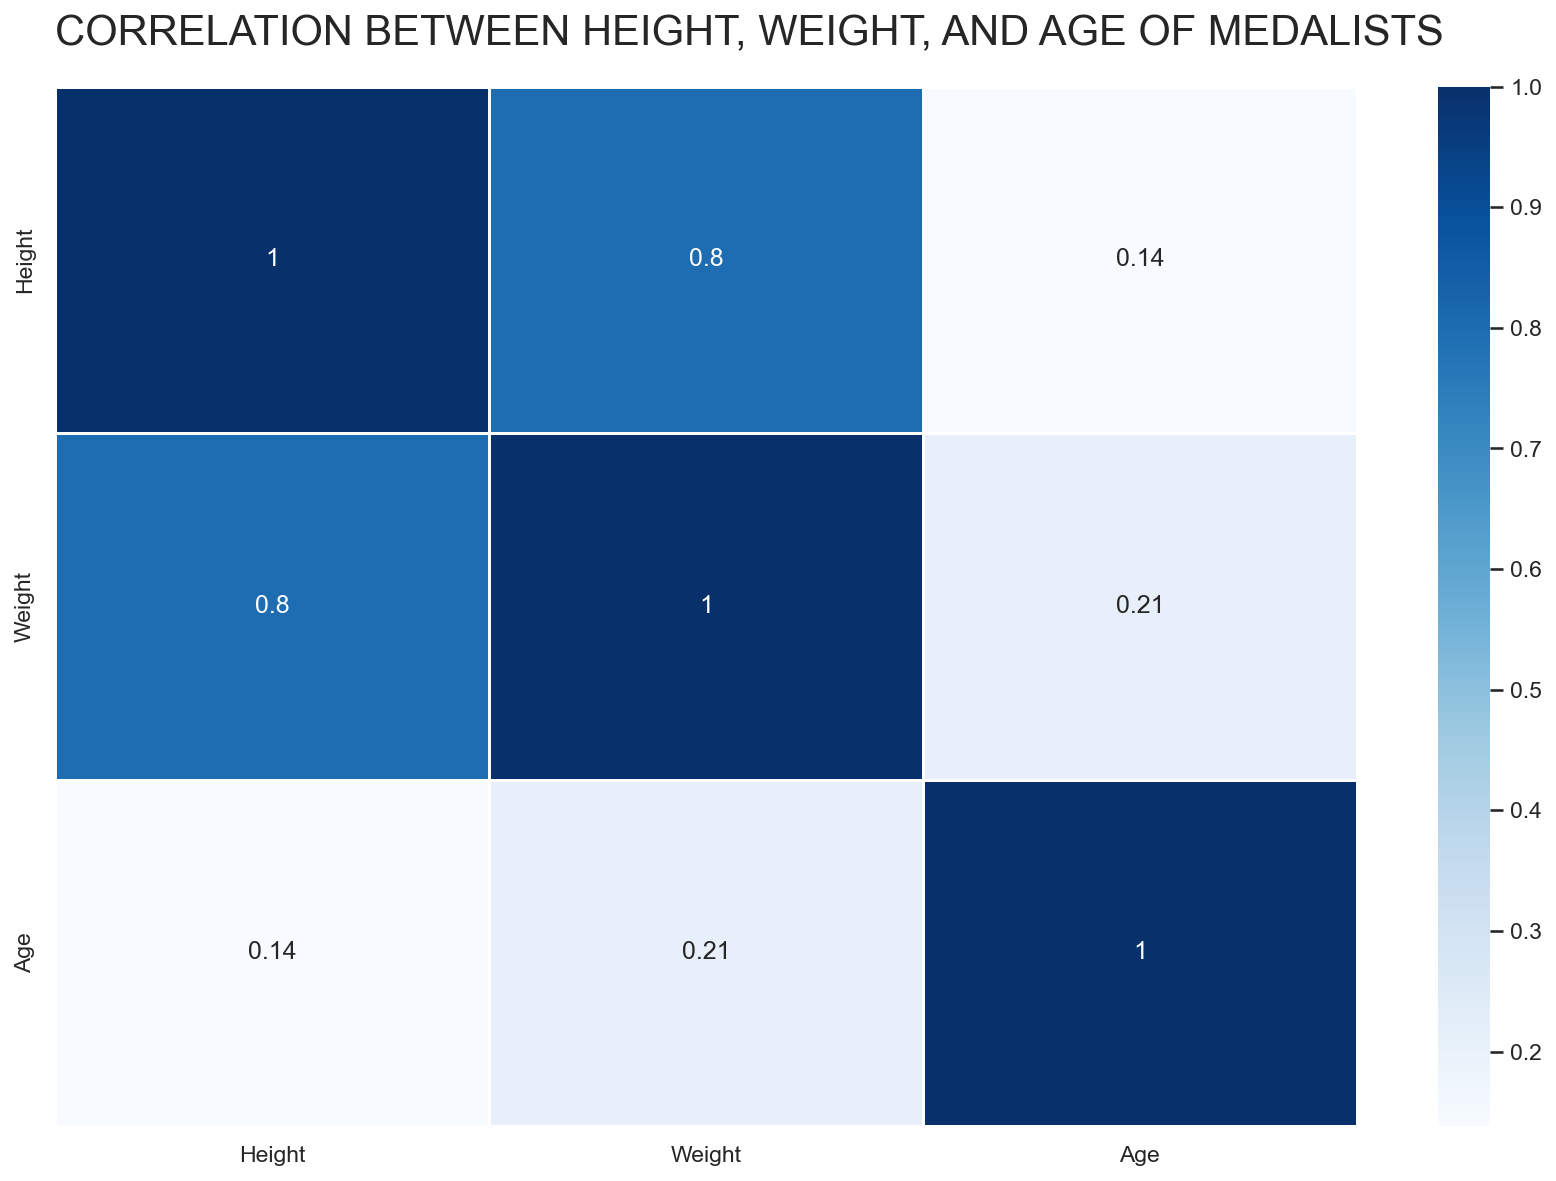

In [46]:
# Calculate the correlation matrix
correlation_matrix = df[['Height', 'Weight', 'Age']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap = 'Blues', linewidths=0.5)
# Set the title and axis labels
plt.title('CORRELATION BETWEEN HEIGHT, WEIGHT, AND AGE OF MEDALISTS', loc='left', size=20, pad=20);